### Création de graphique sociotechnique

L’historien est accoutumé à faire tenir sur quelques feuilles de papier
des bibliothèques entières, mais pourquoi ne pas poursuivre ce travail de réduction à travers l’image
en réalisant, comme l’a proposé Bruno LATOUR (2007a), et en particulier la visualisation graphique
(LATOUR, MAUGUIN & TEIL, 1991) ? En effet, l’image en tant que médium est capable de transmettre
l’information dans une forme très dense et si étymologiquement « comprendre » signifie « prendre avec »
être capable de représenter une réalité complexe dans une image est à la fois une formidable analyse et
communication d’une compréhension épaisse du réel.

Traduire cette narration en langage visuel a pour objectif de permettre d’approcher le phénomène
décrit d’une manière plus intuitive et de saisir simultanément toute la trajectoire d’un projet. Les gra-
phiques qui suivent ne sont donc pas à interpréter comme des graphiques cartésiens, ils ne représentent
pas des valeurs absolues dans des chiffres et des formules et n’ont pas vocation non plus à prédire un
futur. L’objectif n’est donc pas de représenter une ligne du temps, mais plutôt, pour reprendre une image de Bergson (B ERGSON , W ORMS & B OUANICHE, 2013, p. 83),de donner l’intuition d’un mouvement
rapide, brûlée en un seul mouvement, comme lorsqu’on peut observer le parcours d’une étoile filante à
travers le ciel.

### Script de départ

Nous débutons avec une version condensée de l'histoire d'une innovation. Plutôt que de représenter chaque actant par une lettre, représentons les par un mot afin de rester plus facilement déchiffrable.  

---


```

2010: RMDP Synergie Tout-en-un RTC_Liège Védia Télésambre Boukè Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre Notélé Bx1 -//-


2015: RMDP Synergie Tout-en-un RTC_Liège Védia Télésambre Boukè Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre Step2e  Phase_de_test -//- Lenteur Stabilité


2017: RMDP Synergie Tout-en-un RTC_Liège Védia Télésambre Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre Step2e  Phase_de_test Développement_Cinergie -//- Lenteur


2018: RMDP Synergie Tout-en-un RTC_Liège Védia Télésambre Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre Step2e*  Phase_de_test -//- -Lenteur -Stabilité Faillite


Fin 2018: RTC_Liège DB_Step2e MAM -//-


Juillet 2019: Synergie Tout-en-un* RTC_Liège DB_Step2e MAM Développeur_web Export Module_planning Module_conduite Védia* Télésambre* Boukè* Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre -//- Fiche_Conduite


Juillet 2021: Synergie Tout-en-un* RTC_Liège DB_Step2e MAM Développeur_web Export Module_planning Module_conduite Module_diffusion Védia* Télésambre* Boukè* Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre -//- Fiche_Conduite


Aout 2021: Synergie Tout-en-un RTC_Liège DB_Step2e MAM Développeur_web Export Module_planning Module_conduite Module_diffusion Module_traffic Védia* Télésambre* Boukè* Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre -//- Fiche_Conduite Boucles_Publicitaires


Fin 2021 : Synergie Tout-en-un RTC_Liège DB_Step2e MAM Développeur_web Export Module_planning Module_conduite Module_diffusion Module_traffic Module_web Védia* Télésambre* Boukè* Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre -//- Fiche_Conduite Boucles_Publicitaires


2022 : Synergie Tout-en-un RTC_Liège DB_Step2e MAM Développeur_web Export Module_planning Module_conduite Module_diffusion Module_traffic Module_web Védia* Télésambre* Boukè* Matélé Tvlux Canal_Zoom TV_Com Antenne_Centre VueJS -//- Fiche_Conduite Boucles_Publicitaires
```

In [30]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np
import pandas as pd
import seaborn as sns
import io

### Création de Dataframes à partir du script

In [31]:

def script2csv(script):
    size = [] # Taille totale
    new = [] # Nouveaux alliéd
    len_allies = []
    last = [] 
    already_seen = []
    exploration =[]
    antiprogramme = []
    NAA = []  # NAA = nouveau acteurs agrégés
    NAP = []  # NAP = nouveau acteurs perdus
    version = []
    d = {}
    v = 1
    naa = 0
    label = []

    with open(script) as f :
        lines = f.readlines()

        # Itère pour chaque version du script
        for i in lines :
            lst_a = []
            lst_n = []
            nap = 0
            allié = []
            anti = []
            nouveau = []
            split = i.split(":")
            time = split[0]
            split2 = split[1].split("-//-")
            actants = split2[0].split( )
            all_anti=split2[1].split( )
            size.append(len(actants))
            NAA.append(naa)
            naa = 0
            naa_list = []
            naa_dict = {}


            # Ignore les saut de ligne (\n)
            if actants[-1] == "n" :
                actants = actant[1:-2]
            
            # Itère entre tout les actants d'une version
            for j in actants :
                # Compte les antiprogramme
                # if j[:1] == "-" :
                #     anti.append(j) 
                # else :
                    if j in last and j not in lst_a :
                        naa += 1
                        naa_list.append(j)
                    if j in last :
                        lst_a.append(j)
                        allié.append(j)
                        # if j in tmp_a :
                        #     naa += 1
                    else :
                        lst_n.append(j)
                    if j not in already_seen:
                        already_seen.append(j)
                    if j not in allié :
                        nouveau.append(j)
            label.append(time)
            for k in last :
                if k not in actants :
                    nap += 1   

            for i in all_anti:
                anti.append(i)

            last = actants
            new.append(len(actants)-len(allié))
            len_allies.append(len(allié))
            exploration.append(len(already_seen))
            antiprogramme.append(len(anti))
            NAP.append(nap)


            version = {"Version": time, "Allié": allié, "Nouveau": nouveau, "Antiprogramme": anti}
            d[v] = version
            v += 1




        
    df = pd.DataFrame(zip(size,len_allies,new,exploration,NAP,NAA, antiprogramme), columns=["Taille","Alliés","Nouveaux","Exploration","NAP","NAA", "Anti-Programme"])

    data = pd.DataFrame(d).T

    df.reset_index(inplace=True)
    df["index"] += 1
    # Calculer l'indice de négociation
    # Plus cet indice est petit moins l'innovateur doit négocier son projet pour le maintenir en existence.
    # Inversement, une valeur élevée de cet indice signifie que le projet est en grande partie renégocié. 

    df['IN'] = df.apply(lambda row: row['Nouveaux'] / row['Taille'], axis = 1)


    df['ANC'] = df['Nouveaux'].cumsum()
    df['P'] = df['Nouveaux'].diff()


    df['IR'] = df.apply(lambda row : (row['NAA'].cumsum() - row['NAP'].cumsum())/ row['Exploration'],axis = 1)

    for i in range(1, len(df)):
        df.loc[i, "IS"] = df.loc[i, "Alliés"] / df.loc[i-1, "Taille"]

    return df, data

df = script2csv("Basique.txt")[0]
data = script2csv("Basique.txt")[1]
df.to_csv("summary.csv")
data.to_csv("data.csv")



Une dataframe "data" contient les donnée du script sous une forme plus accessible pour l'analyse alors que "summary" calcule les indicateurs proposé.

In [32]:
display(script2csv("./input/cinergie.txt")[0])
display(script2csv("./input/cinergie.txt")[1])

,index,Taille,Alliés,Nouveaux,Exploration,NAP,NAA,Anti-Programme,IN,ANC,P,IR,IS
0,1,14,0,14,14,0,0,0,1.000000,14,NaN,[0.0],NaN
1,2,14,12,2,16,2,0,2,0.142857,16,-12.0,[-0.125],0.857143
2,3,14,13,1,17,1,12,1,0.071429,17,-1.0,[0.6470588235294118],0.928571
3,4,13,12,1,18,2,13,3,0.076923,18,0.0,[0.6111111111111112],0.857143


,Version,Allié,Nouveau,Antiprogramme
1,2010,[],"[RMDP, Synergie, Tout-en-un, RTC_Liège, Védia,...",[]
2,2015,"[RMDP, Synergie, Tout-en-un, RTC_Liège, Védia,...","[Step2e, Phase_de_test]","[Lenteur, Stabilité]"
3,2017,"[RMDP, Synergie, Tout-en-un, RTC_Liège, Védia,...",[Développement_Cinergie],[Lenteur]
4,2018,"[RMDP, Synergie, Tout-en-un, RTC_Liège, Védia,...",[Step2e*],"[-Lenteur, -Stabilité, Faillite]"


### Réalisation de graphiques

#### Graphique sociotechnique simple

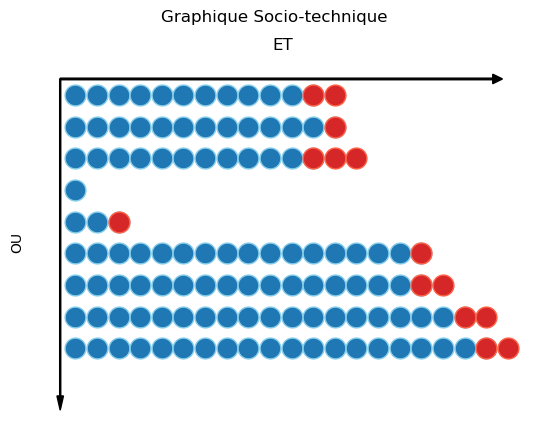

In [33]:

csv = "./summary.csv"

df = pd.read_csv(csv)
fig, ax = plt.subplots()
y = 0

markerpro = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='skyblue')

markeranti = dict(marker='o', linestyle=':', markersize=15,
                           color='firebrick',
                           markerfacecolor='tab:red',
                           markerfacecoloralt='firebrick',
                           markeredgecolor='tomato')

for version in df.index:

    pros = int(df["Alliés"][version])
    for pro in range(pros):
        m = MarkerStyle("o")
        ax.plot(pro*10, y*10, **markerpro)
    if df["Anti-Programme"][version] != 0:
        antis = df["Anti-Programme"][version]
        for anti in  range(antis):
            m2 = MarkerStyle("o")
            ax.plot((pro+anti)*10, y*10, **markeranti)
    y +=1


ax.invert_yaxis()
ax.set_xlabel("")
ax.set_ylabel("OU")
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_title('ET')
fig.suptitle("Graphique Socio-technique")

plt.arrow(-7, 5, 200, 0, width=0.5, head_width=3, color = "black")
plt.arrow(-7, 5, 0, 100, width=0.5, head_width=3, color = "black")

for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

plt.show()

#### Graphique sociotechnique avec indice de négociation

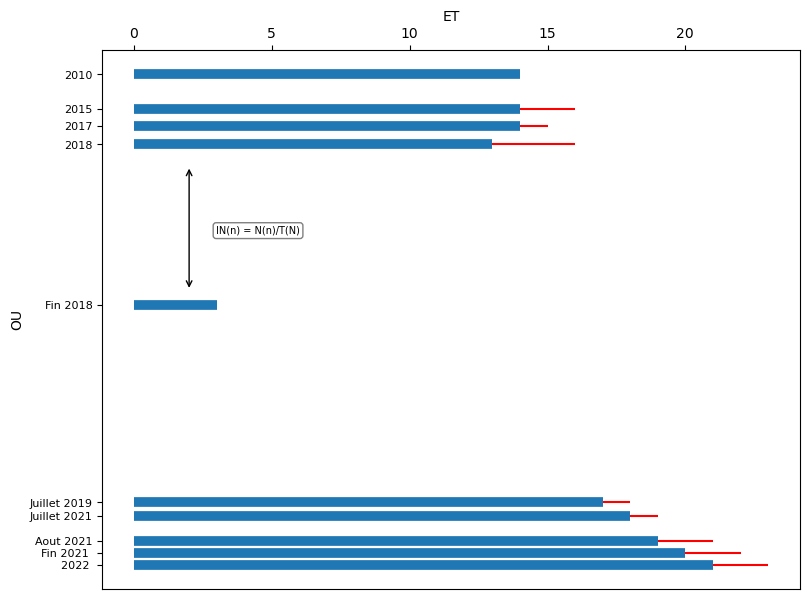

In [34]:

labels = data.Version.tolist()


fig, ax = plt.subplots(figsize=(9,7))

ax.text(
    4.5, 1.65, "IN(n) = N(n)/T(N)", ha="center", va="center", rotation=0, size=7,
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="grey", lw=1))

ax.annotate("",
            xy=(2, 1.38), xycoords='data',
            xytext=(2, 1.9), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

ax.xaxis.tick_top()
ax.set_xlabel("ET")
ax.xaxis.set_label_position('top') 
ax.set_ylabel("OU")
ax.invert_yaxis() 
ax.set_yticks(df["IN"].cumsum(), labels=labels, size=8)

ax = plt.hlines(xmin = 0, xmax = df["Taille"], y = df["IN"].cumsum(), linewidth=7)
ax = plt.hlines(xmin = df["Taille"], xmax = (df["Taille"] + df["Anti-Programme"]), y = df["IN"].cumsum(), colors="red")


# fig.tight_layout()
plt.savefig("graphIN.svg",facecolor='w', dpi=300)

#### Graphique des indicateurs sociotechniques

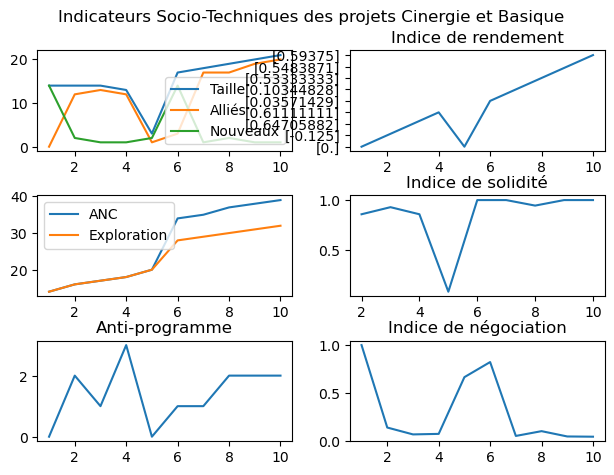

In [35]:

fig, ax = plt.subplots(3,2)
fig.suptitle('Indicateurs Socio-Techniques des projets Cinergie et Basique')
fig.tight_layout()



ax[0,0].plot(df["index"], df["Taille"], label = "Taille")
ax[0,0].plot(df["index"], df["Alliés"], label = "Alliés")
ax[0,0].plot(df["index"], df["Nouveaux"], label = "Nouveaux")
ax[0,0].legend()
# df.plot(x = "index", y = ["Taille","Alliés","Nouveaux"])
# df.plot(x = "index", y = ["ANC", "Exploration"])

ax[1,0].plot(df["index"], df["ANC"], label = "ANC")
ax[1,0].plot(df["index"], df["Exploration"], label = "Exploration")
ax[1,0].legend()

ax[2,0].plot(df["index"], df["Anti-Programme"], label = "Anti-Programme")
ax[2,0].set_title('Anti-programme')

ax[0,1].plot(df["index"], df['IR'])
ax[0,1].set_title('Indice de rendement')

ax[1,1].plot(df["index"], df['IS'])
ax[1,1].set_title("Indice de solidité")

ax[2,1].plot(df["index"], df['IN'])
ax[2,1].set_title("Indice de négociation")


plt.savefig("indicateurs.png",facecolor='w', dpi=300)

### Dashboard intéractif

In [36]:
import panel as pn
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import io
import pandas as pd
from panel.widgets import Tabulator
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.markers import MarkerStyle

pn.extension()

def script2df(script):
    size = [] # Taille totale
    new = [] # Nouveaux alliéd
    len_allies = []
    last = [] 
    already_seen = []
    exploration =[]
    antiprogramme = []
    NAA = []  # NAA = nouveau acteurs agrégés
    NAP = []  # NAP = nouveau acteurs perdus
    version = []
    d = {}
    v = 1
    naa = 0
    label = []

    buf = io.StringIO(script)
    lines = buf.readlines()
    # Itère pour chaque version du script
    for i in lines :
        lst_a = []
        lst_n = []
        nap = 0
        allié = []
        anti = []
        nouveau = []
        split = i.split(":")
        time = split[0]
        split2 = split[1].split("-//-")
        actants = split2[0].split( )
        all_anti=split2[1].split( )
        size.append(len(actants))
        NAA.append(naa)
        naa = 0
        naa_list = []
        naa_dict = {}


        # Ignore les saut de ligne (\n)
        if actants[-1] == "n" :
            actants = actant[1:-2]
        
        # Itère entre tout les actants d'une version
        for j in actants :
            # Compte les antiprogramme
            # if j[:1] == "-" :
            #     anti.append(j) 
            # else :
                if j in last and j not in lst_a :
                    naa += 1
                    naa_list.append(j)
                if j in last :
                    lst_a.append(j)
                    allié.append(j)
                    # if j in tmp_a :
                    #     naa += 1
                else :
                    lst_n.append(j)
                if j not in already_seen:
                    already_seen.append(j)
                if j not in allié :
                    nouveau.append(j)
        label.append(time)
        for k in last :
            if k not in actants :
                nap += 1   

        for i in all_anti:
            anti.append(i)

        last = actants
        new.append(len(actants)-len(allié))
        len_allies.append(len(allié))
        exploration.append(len(already_seen))
        antiprogramme.append(len(anti))
        NAP.append(nap)


        version = {"Version": time, "Allié": allié, "Nouveau": nouveau, "Antiprogramme": anti}
        d[v] = version
        v += 1

    data = pd.DataFrame(d).T
    df = pd.DataFrame(zip(size, len_allies, new, exploration, NAP, NAA, antiprogramme), columns=["Taille","Alliés","Nouveaux","Exploration","NAP","NAA", "Anti-Programme"])
    
    df.reset_index(inplace=True)
    df["index"] += 1

    # Calculer l'indice de négociation
    # Plus cet indice est petit moins l'innovateur doit négocier son projet pour le maintenir en existence.
    # Inversement, une valeur élevée de cet indice signifie que le projet est en grande partie renégocié. 

    df['IN'] = df.apply(lambda row: row['Nouveaux'] / row['Taille'], axis = 1)
    df['ANC'] = df['Nouveaux'].cumsum()
    df['P'] = df['Nouveaux'].diff()
    df['IR'] = df.apply(lambda row : (row['NAA'].cumsum() - row['NAP'].cumsum())/ row['Exploration'],axis = 1)

    for i in range(1, len(df)):
        df.loc[i, "IS"] = df.loc[i, "Alliés"] / df.loc[i-1, "Taille"]

    df.set_index("index", inplace=True)
    df_full = df.join(data["Version"])

    return df_full



def basicgraph(df) :

    fig = Figure(figsize= (8, 6))
    ax = fig.subplots()

    y = 0

    markerpro = dict(marker='o', linestyle=':', markersize=15,
                            color='darkgrey',
                            markerfacecolor='tab:blue',
                            markerfacecoloralt='lightsteelblue',
                            markeredgecolor='skyblue')

    markeranti = dict(marker='o', linestyle=':', markersize=15,
                            color='firebrick',
                            markerfacecolor='tab:red',
                            markerfacecoloralt='firebrick',
                            markeredgecolor='tomato')

    for version in df.index:

        pros = int(df["Alliés"][version])
        for pro in range(pros):
            m = MarkerStyle("o")
            ax.plot(pro*10, y*10, **markerpro)
        if df["Anti-Programme"][version] != 0:
            antis = df["Anti-Programme"][version]
            for anti in  range(antis):
                m2 = MarkerStyle("o")
                ax.plot((pro+anti)*10, y*10, **markeranti)
        y +=1


    ax.invert_yaxis()
    ax.set_xlabel("")
    ax.set_ylabel("OU")
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.set_title('ET')
    fig.suptitle("Graphique Socio-technique")

    plt.arrow(-7, 5, 200, 0, width=0.5, head_width=3, color = "black")
    plt.arrow(-7, 5, 0, 100, width=0.5, head_width=3, color = "black")

    for pos in ['right', 'top', 'bottom', 'left']:
        plt.gca().spines[pos].set_visible(False)

    return fig

def complexgraph(df) :

    labels = df["Version"].tolist()
    
    fig = Figure(figsize= (8, 9))
    ax = fig.subplots()

    fig.suptitle('Graphique sociotechnique avec indicateur de négociation')

    ax.xaxis.tick_top()
    ax.set_xlabel("ET")
    ax.xaxis.set_label_position('top') 
    ax.set_ylabel("OU")
    ax.invert_yaxis() 
    ax.set_yticks(df["IN"].cumsum(), labels=labels, size=8)

    ax.hlines(xmin = 0, xmax = df["Taille"], y = df["IN"].cumsum(), linewidth=7)
    ax.hlines(xmin = df["Taille"], xmax = (df["Taille"] + df["Anti-Programme"]), y = df["IN"].cumsum(), colors="red")

    return fig

def indicateursgraph(df) :

    fig = Figure(figsize= (10,7))
    ax = fig.subplots(3,2)

    fig.suptitle('Indicateurs sociotechniques')


    ax[0,0].plot(df.reset_index()["index"], df["Taille"], label = "Taille")
    ax[0,0].plot(df.reset_index()["index"], df["Alliés"], label = "Alliés")
    ax[0,0].plot(df.reset_index()["index"], df["Nouveaux"], label = "Nouveaux")
    ax[0,0].legend()
    # df.plot(x = "index", y = ["Taille","Alliés","Nouveaux"])
    # df.plot(x = "index", y = ["ANC", "Exploration"])

    ax[1,0].plot(df.reset_index()["index"], df["ANC"], label = "ANC")
    ax[1,0].plot(df.reset_index()["index"], df["Exploration"], label = "Exploration")
    ax[1,0].legend()

    ax[2,0].plot(df.reset_index()["index"], df["Anti-Programme"], label = "Anti-Programme")
    ax[2,0].set_title('Anti-programme')

    ax[0,1].plot(df.reset_index()["index"], df['IR'])
    ax[0,1].set_title('Indice de rendement')

    ax[1,1].plot(df.reset_index()["index"], df['IS'])
    ax[1,1].set_title("Indice de solidité")

    ax[2,1].plot(df.reset_index()["index"], df['IN'])
    ax[2,1].set_title("Indice de négociation")

    return fig



def callback(target, event):
    target.value = script2df(event.new)

def dftosimplegraph(target, event):
    target.object = basicgraph(event.new)

def dftocomplexgraph(target,event):
    target.object = complexgraph(event.new)

def dftoindicateursgraph(target,event):
    target.object = indicateursgraph(event.new)

placeholder = """nom1 : actant1 actant 2 actant3 -//-
nom2 : actant1 actant2 actant3 actant4 -//- actant5 actant6
nom4 : actant7 -//- 
nom5 : actant1 actant2 actant3 actant7 -//- 
"""

mpl_pane1 = pn.pane.Matplotlib(Figure(figsize= (8, 6)), dpi=150)
mpl_pane1.param.trigger('object')

mpl_pane2 = pn.pane.Matplotlib(Figure(figsize= (8, 9)), dpi=150)
mpl_pane2.param.trigger('object')

mpl_pane3 = pn.pane.Matplotlib(Figure(figsize=(8,6)), dpi=200, tight=True)
mpl_pane3.param.trigger('object')

text_area_input = pn.widgets.input.TextAreaInput(name='Script',width=700, height= 300)
text_area_input.value = placeholder

summary = Tabulator(pd.DataFrame(script2df(placeholder)))
summary.link(mpl_pane1, callbacks={'value' : dftosimplegraph})
summary.link(mpl_pane2, callbacks={'value' : dftocomplexgraph})
summary.link(mpl_pane3, callbacks={'value' : dftoindicateursgraph})

text_area_input.link(summary, callbacks={'value' : callback})

filename, download_button = summary.download_menu(
    text_kwargs={'name': 'Enter filename', 'value': 'summary.csv'},
    button_kwargs={'name': 'Download table'}
)

markdown = pn.pane.Markdown("""
### Générateur de graphique sociotechnique

 - Chaque actant doit être en un mot

 - Les actants doivent être séparés d'un espace

 - Chaque version occupe une ligne

 - Une ligne de front "-//-" doit finir chaque ligne

 - Les anti-programmes peuvent être renseigner après la ligne de front en les débutant d'un "-"
""")


dashboard = pn.Column(
            pn.Row(text_area_input,pn.Column(markdown, filename, download_button)),
            summary, 
            pn.Row(pn.Spacer(seizing_mode="scale_both"), mpl_pane1, mpl_pane2,pn.Spacer(seizing_mode="scale_both")),
            pn.Row(pn.Spacer(seizing_mode="scale_both"), mpl_pane3, pn.Spacer(seizing_mode="scale_both"))
            )

dashboard

Launching server at http://localhost:44943
